In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Adam import AdamOptim
from SGD import SGD
from utils import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from Logreg import LogisticRegression
from IRLS import IRLS
from sklearn.preprocessing import LabelEncoder

np.seterr(divide="ignore")
np.seterr(invalid="ignore")
np.seterr(over="ignore")

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

## NBA PLAYERS DATA ##

In [3]:
# data:
url = "data/big/nba-players.csv"
dataframe = pd.read_csv(url)
dataframe.drop("name", axis=1, inplace=True)
dataframe.drop("Unnamed: 0", axis=1, inplace=True)
data = dataframe.values
dataframe.head()

X, y = data[:, :-1], data[:, -1]

In [4]:
X.shape

(1340, 19)

In [5]:
# ADAM
splitting_seeds = [42, 43, 44, 45, 46]
adam_accuracy = []
with open("results/balance_accuracy_3.csv", "a") as f:
    f.write(f"nba_data, adam")
    with open("losses.csv", "a") as l:
        l.write(f"nba_data, adam")
        for seed in splitting_seeds:
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.2, random_state=seed
            )
            X_train, X_val, y_train, y_val = train_test_split(
                X_train, y_train, test_size=0.2, random_state=seed
            )
            logistic_regression_model = LogisticRegression(input_dim=X_train.shape[1])
            adam_optimizer = AdamOptim(eta=0.01)

            logistic_regression_model.train(
                X_train,
                y_train,
                optimizer=adam_optimizer,
                patience=5,
                epochs=500,
                batch_size=64,
                X_val=X_val,
                y_val=y_val,
            )
            y_pred = logistic_regression_model.predict(X_test)
            adam_accuracy.append(balanced_accuracy_score(y_test, y_pred.round()))
            f.write(f", {balanced_accuracy_score(y_test,y_pred.round())}")
            if seed == 42:
                l.write(f", {logistic_regression_model.losses}\n")
        f.write("\n")

Epoch::   2%|▏         | 8/500 [00:00<00:04, 115.56it/s]


Early stopping after epoch 8
Reverting to the weights corresponding to the lowest validation loss


Epoch::   2%|▏         | 8/500 [00:00<00:04, 105.49it/s]


Early stopping after epoch 8
Reverting to the weights corresponding to the lowest validation loss


Epoch::   9%|▉         | 45/500 [00:00<00:02, 160.72it/s]


Early stopping after epoch 45
Reverting to the weights corresponding to the lowest validation loss


Epoch::   1%|▏         | 7/500 [00:00<00:02, 173.80it/s]


Early stopping after epoch 7
Reverting to the weights corresponding to the lowest validation loss


Epoch::   3%|▎         | 13/500 [00:00<00:02, 186.84it/s]

Early stopping after epoch 13
Reverting to the weights corresponding to the lowest validation loss


In [6]:
# IRLS
splitting_seeds = [42, 43, 44, 45, 46]
irls_accuracy = []
with open("results/balance_accuracy_3.csv", "a") as f:
    f.write(f"nba_data, irls")
    with open("losses.csv", "a") as l:
        l.write(f"nba_data, irls")
        for seed in splitting_seeds:
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.2, random_state=seed
            )
            X_train, X_val, y_train, y_val = train_test_split(
                X_train, y_train, test_size=0.2, random_state=seed
            )
            logistic_regression_model = LogisticRegression(input_dim=X_train.shape[1])
            irls_optimizer = IRLS()
            # batch_size from 256 possible
            logistic_regression_model.train(
                X_train,
                y_train,
                optimizer=irls_optimizer,
                patience=5,
                epochs=500,
                batch_size=X_train.shape[0],
                X_val=X_val,
                y_val=y_val,
            )
            y_pred = logistic_regression_model.predict(X_test)
            irls_accuracy.append(balanced_accuracy_score(y_test, y_pred.round()))
            f.write(f", {balanced_accuracy_score(y_test,y_pred.round())}")
            if seed == 42:
                l.write(f", {logistic_regression_model.losses}\n")

Epoch::   1%|          | 5/500 [00:00<00:57,  8.68it/s]


Early stopping after epoch 5
Reverting to the weights corresponding to the lowest validation loss


Epoch::   1%|          | 6/500 [00:00<00:59,  8.31it/s]


Early stopping after epoch 6
Reverting to the weights corresponding to the lowest validation loss


Epoch::   1%|          | 6/500 [00:01<01:40,  4.91it/s]


Early stopping after epoch 6
Reverting to the weights corresponding to the lowest validation loss


Epoch::   1%|          | 5/500 [00:00<01:12,  6.79it/s]


Early stopping after epoch 5
Reverting to the weights corresponding to the lowest validation loss


Epoch::   1%|          | 6/500 [00:00<01:05,  7.50it/s]

Early stopping after epoch 6
Reverting to the weights corresponding to the lowest validation loss


In [7]:
# SGD
splitting_seeds = [42, 43, 44, 45, 46]
sgd_accuracy = []
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_scaled = ss.fit_transform(X)
with open("results/balance_accuracy_3.csv", "a") as f:
    f.write(f"nba_data, sgd")
    with open("losses.csv", "a") as l:
        l.write(f"nba_data, sgd")
        for seed in splitting_seeds:
            X_train, X_test, y_train, y_test = train_test_split(
                X_scaled, y, test_size=0.2, random_state=seed
            )
            X_train, X_val, y_train, y_val = train_test_split(
                X_train, y_train, test_size=0.2, random_state=seed
            )
            logistic_regression_model = LogisticRegression(input_dim=X_train.shape[1])
            sgd_optimizer = SGD(eta=0.00001)

            logistic_regression_model.train(
                X_train,
                y_train,
                optimizer=sgd_optimizer,
                patience=10,
                epochs=500,
                batch_size=32,
                X_val=X_val,
                y_val=y_val,
            )
            y_pred = logistic_regression_model.predict(X_test)
            sgd_accuracy.append(balanced_accuracy_score(y_test, y_pred.round()))
            f.write(f", {balanced_accuracy_score(y_test,y_pred.round())}")
            if seed == 42:
                l.write(f", {logistic_regression_model.losses}\n")

Epoch:: 100%|██████████| 500/500 [00:02<00:00, 213.67it/s]


In [8]:
# Comparison Models
from utils import fitComparisonModels

splitting_seeds = [42, 43, 44, 45, 46]
comparison_accuracy = []
with open("results/balance_accuracy_3.csv", "a") as f:
    f.write(f"data_set, algorithm")
    for seed in splitting_seeds:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=seed
        )
        y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
        f.write(f", seed_{seed}_acc")
    f.write("\n")
    f.write(f"nba_data, lda")
    for seed in splitting_seeds:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=seed
        )
        y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
        f.write(f", {balanced_accuracy_score(y_test, y_lda)}")
    f.write("\n")
    f.write(f"nba_data, qda")
    for seed in splitting_seeds:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=seed
        )
        y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
        f.write(f", {balanced_accuracy_score(y_test, y_qda)}")
    f.write("\n")
    f.write(f"nba_data, dt")
    for seed in splitting_seeds:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=seed
        )
        y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
        f.write(f", {balanced_accuracy_score(y_test, y_dt)}")
    f.write("\n")
    f.write(f"nba_data, rf")
    for seed in splitting_seeds:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=seed
        )
        y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
        f.write(f", {balanced_accuracy_score(y_test, y_rf)}")
    f.write("\n")

## SMOKING DATA ##

In [9]:
url = "data/big/smoking.csv"
dataframe = pd.read_csv(url)
dataframe.drop("oral", axis=1, inplace=True)
data = dataframe.values

X, y = data[:, :-1], data[:, -1]
X[:, 1] = LabelEncoder().fit_transform(X[:, 1])
X[:, -1] = LabelEncoder().fit_transform(X[:, -1])

In [10]:
X.shape

(55692, 25)

In [11]:
# ADAM
splitting_seeds = [42, 43, 44, 45, 46]
adam_accuracy = []
with open("results/balance_accuracy_3.csv", "a") as f:
    f.write(f"smoking_data, adam")
    with open("losses.csv", "a") as l:
        l.write(f"smoking_data, adam")
        for seed in splitting_seeds:
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.2, random_state=seed
            )
            X_val, X_test, y_val, y_test = train_test_split(
                X_test, y_test, test_size=0.2, random_state=seed
            )
            y_train = y_train.astype("int")
            y_test = y_test.astype("int")

            logistic_regression_model = LogisticRegression(input_dim=X_train.shape[1])
            adam_optimizer = AdamOptim(eta=0.001)

            logistic_regression_model.train(
                X_train,
                y_train,
                optimizer=adam_optimizer,
                patience=5,
                epochs=500,
                batch_size=64,
                X_val=X_val,
                y_val=y_val,
            )
            y_pred = logistic_regression_model.predict(X_test)
            adam_accuracy.append(balanced_accuracy_score(y_test, y_pred.round()))
            f.write(f", {balanced_accuracy_score(y_test,y_pred.round())}")
            if seed == 42:
                l.write(f", {logistic_regression_model.losses}\n")

Epoch::   5%|▌         | 25/500 [00:04<01:25,  5.55it/s]


Early stopping after epoch 25
Reverting to the weights corresponding to the lowest validation loss


Epoch::   2%|▏         | 10/500 [00:01<01:35,  5.16it/s]


Early stopping after epoch 10
Reverting to the weights corresponding to the lowest validation loss


Epoch::   6%|▌         | 30/500 [00:05<01:25,  5.51it/s]


Early stopping after epoch 30
Reverting to the weights corresponding to the lowest validation loss


Epoch::   9%|▉         | 44/500 [00:07<01:13,  6.16it/s]


Early stopping after epoch 44
Reverting to the weights corresponding to the lowest validation loss


Epoch::   1%|▏         | 7/500 [00:01<01:36,  5.10it/s]

Early stopping after epoch 7
Reverting to the weights corresponding to the lowest validation loss


In [12]:
# IRLS
splitting_seeds = [42, 43, 44, 45, 46]
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X = ss.fit_transform(X)
irls_accuracy = []
with open("results/balance_accuracy_3.csv", "a") as f:
    f.write(f"smoking_data, irls")
    with open("losses.csv", "a") as l:
        l.write(f"smoking_data, irls")
        for seed in splitting_seeds:
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.2, random_state=seed, stratify=y
            )
            X_val, X_test, y_val, y_test = train_test_split(
                X_test, y_test, test_size=0.2, random_state=seed, stratify=y_test
            )
            y_train = y_train.astype("int")
            y_test = y_test.astype("int")
            logistic_regression_model = LogisticRegression(input_dim=X_train.shape[1])
            irls_optimizer = IRLS()

            logistic_regression_model.train(
                X_train,
                y_train,
                optimizer=irls_optimizer,
                patience=5,
                epochs=500,
                batch_size=16384,
                X_val=X_val,
                y_val=y_val,
            )
            y_pred = logistic_regression_model.predict(X_test)
            irls_accuracy.append(balanced_accuracy_score(y_test, y_pred.round()))
            f.write(f", {balanced_accuracy_score(y_test,y_pred.round())}")
            if seed == 42:
                l.write(f", {logistic_regression_model.losses}\n")

Epoch::   1%|          | 5/500 [00:31<51:52,  6.29s/it]


Early stopping after epoch 5
Reverting to the weights corresponding to the lowest validation loss


Epoch::   1%|          | 6/500 [00:40<55:34,  6.75s/it]


Early stopping after epoch 6
Reverting to the weights corresponding to the lowest validation loss


Epoch::   1%|          | 5/500 [00:31<51:13,  6.21s/it]


Early stopping after epoch 5
Reverting to the weights corresponding to the lowest validation loss


Epoch::   1%|          | 5/500 [00:29<49:28,  6.00s/it]


Early stopping after epoch 5
Reverting to the weights corresponding to the lowest validation loss


Epoch::   1%|          | 5/500 [00:32<52:49,  6.40s/it]

Early stopping after epoch 5
Reverting to the weights corresponding to the lowest validation loss


In [13]:
# SGD
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_scaled = ss.fit_transform(X)
splitting_seeds = [42, 43, 44, 45, 46]
sgd_accuracy = []
with open("results/balance_accuracy_3.csv", "a") as f:
    f.write(f"smoking_data, sgd")
    with open("losses.csv", "a") as l:
        l.write(f"smoking_data, sgd")
        for seed in splitting_seeds:
            X_train, X_test, y_train, y_test = train_test_split(
                X_scaled, y, test_size=0.2, random_state=seed
            )
            X_val, X_test, y_val, y_test = train_test_split(
                X_test, y_test, test_size=0.2, random_state=seed
            )
            y_train = y_train.astype("int")
            y_test = y_test.astype("int")
            logistic_regression_model = LogisticRegression(input_dim=X_train.shape[1])
            sgd_optimizer = SGD(eta=0.01)

            logistic_regression_model.train(
                X_train,
                y_train,
                optimizer=sgd_optimizer,
                patience=5,
                epochs=500,
                batch_size=32,
                X_val=X_val,
                y_val=y_val,
            )
            y_pred = logistic_regression_model.predict(X_test)
            sgd_accuracy.append(balanced_accuracy_score(y_test, y_pred.round()))
            f.write(f", {balanced_accuracy_score(y_test,y_pred.round())}")
            if seed == 42:
                l.write(f", {logistic_regression_model.losses}\n")
    f.write("\n")

Epoch::   3%|▎         | 14/500 [00:00<00:14, 32.83it/s]


Early stopping after epoch 14
Reverting to the weights corresponding to the lowest validation loss


Epoch::   3%|▎         | 17/500 [00:00<00:13, 35.63it/s]


Early stopping after epoch 17
Reverting to the weights corresponding to the lowest validation loss


Epoch::   3%|▎         | 13/500 [00:00<00:13, 36.00it/s]


Early stopping after epoch 13
Reverting to the weights corresponding to the lowest validation loss


Epoch::   9%|▉         | 45/500 [00:01<00:14, 31.99it/s]


Early stopping after epoch 45
Reverting to the weights corresponding to the lowest validation loss


Epoch::   2%|▏         | 12/500 [00:00<00:14, 34.83it/s]

Early stopping after epoch 12
Reverting to the weights corresponding to the lowest validation loss


In [14]:
# Comparison Models
from utils import fitComparisonModels

splitting_seeds = [42, 43, 44, 45, 46]
comparison_accuracy = []
with open("results/balance_accuracy_3.csv", "a") as f:
    for seed in splitting_seeds:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=seed
        )
        y_train = y_train.astype("int")
        y_test = y_test.astype("int")
        y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
    f.write("\n")
    f.write(f"smoking_data, lda")
    for seed in splitting_seeds:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=seed
        )
        y_train = y_train.astype("int")
        y_test = y_test.astype("int")
        y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
        f.write(f", {balanced_accuracy_score(y_test, y_lda)}")
    f.write("\n")
    f.write(f"smoking_data, qda")
    for seed in splitting_seeds:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=seed
        )
        y_train = y_train.astype("int")
        y_test = y_test.astype("int")
        y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
        f.write(f", {balanced_accuracy_score(y_test, y_qda)}")
    f.write("\n")
    f.write(f"smoking_data, dt")
    for seed in splitting_seeds:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=seed
        )
        y_train = y_train.astype("int")
        y_test = y_test.astype("int")
        y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
        f.write(f", {balanced_accuracy_score(y_test, y_dt)}")
    f.write("\n")
    f.write(f"smoking_data, rf")
    for seed in splitting_seeds:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=seed
        )
        y_train = y_train.astype("int")
        y_test = y_test.astype("int")
        y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
        f.write(f", {balanced_accuracy_score(y_test, y_rf)}")
    f.write("\n")

## BANANA DATA ##

In [15]:
from sklearn.impute import SimpleImputer

url = "data/small/banana_quality.csv"
dataframe = pd.read_csv(url)
data = dataframe.values
dataframe.head()

X, y = data[:, :-1], data[:, -1]
y = LabelEncoder().fit_transform(y)
X.shape

(8000, 7)

Epoch::  10%|█         | 104/1024 [00:00<00:05, 160.14it/s]


Early stopping after epoch 104
Reverting to the weights corresponding to the lowest validation loss
accuracy : 0.8792029566677454


Epoch::   7%|▋         | 71/1024 [00:00<00:05, 162.37it/s]


Early stopping after epoch 71
Reverting to the weights corresponding to the lowest validation loss
accuracy : 0.880522356684812


Epoch::   7%|▋         | 76/1024 [00:00<00:05, 164.00it/s]


Early stopping after epoch 76
Reverting to the weights corresponding to the lowest validation loss
accuracy : 0.8818268766438655


Epoch::   9%|▉         | 96/1024 [00:00<00:05, 165.11it/s]


Early stopping after epoch 96
Reverting to the weights corresponding to the lowest validation loss
accuracy : 0.8789640856342538


Epoch:: 100%|██████████| 1024/1024 [00:06<00:00, 160.26it/s]


accuracy : 0.879189741514651


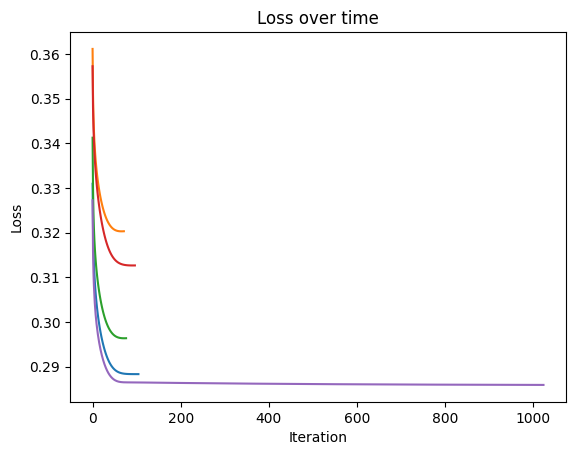

In [16]:
# ADAM
splitting_seeds = [42, 43, 44, 45, 46]
adam_accuracy = []
with open("results/balance_accuracy_3.csv", "a") as f:
    f.write(f"banana_data, adam")
    with open("losses.csv", "a") as l:
        l.write(f"banana_data, adam")
        for seed in splitting_seeds:
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.2, random_state=seed
            )
            X_train, X_val, y_train, y_val = train_test_split(
                X_train, y_train, test_size=0.2, random_state=seed
            )
            logistic_regression_model = LogisticRegression(input_dim=X_train.shape[1])
            adam_optimizer = AdamOptim(eta=0.01)

            logistic_regression_model.train(
                X_train,
                y_train,
                optimizer=adam_optimizer,
                patience=5,
                epochs=1024,
                batch_size=64,
                X_val=X_val,
                y_val=y_val,
            )
            y_pred = logistic_regression_model.predict(X_test)
            adam_accuracy.append(balanced_accuracy_score(y_test, y_pred.round()))
            print(f"accuracy : {balanced_accuracy_score(y_test,y_pred.round())}")
            logistic_regression_model.plot_loss()
            f.write(f", {balanced_accuracy_score(y_test,y_pred.round())}")
            if seed == 42:
                l.write(f", {logistic_regression_model.losses}\n")

Epoch::   3%|▎         | 14/500 [00:05<03:10,  2.54it/s]


Early stopping after epoch 14
Reverting to the weights corresponding to the lowest validation loss
accuracy : 0.8785033432920757


Epoch::   2%|▏         | 12/500 [00:04<02:55,  2.78it/s]


Early stopping after epoch 12
Reverting to the weights corresponding to the lowest validation loss
accuracy : 0.8817320511197488


Epoch::   3%|▎         | 13/500 [00:03<02:09,  3.75it/s]


Early stopping after epoch 13
Reverting to the weights corresponding to the lowest validation loss
accuracy : 0.885646348762813


Epoch::   3%|▎         | 13/500 [00:03<02:20,  3.46it/s]


Early stopping after epoch 13
Reverting to the weights corresponding to the lowest validation loss
accuracy : 0.8789640856342538


Epoch::   4%|▎         | 18/500 [00:05<02:28,  3.26it/s]

Early stopping after epoch 18
Reverting to the weights corresponding to the lowest validation loss
accuracy : 0.8800092220972744


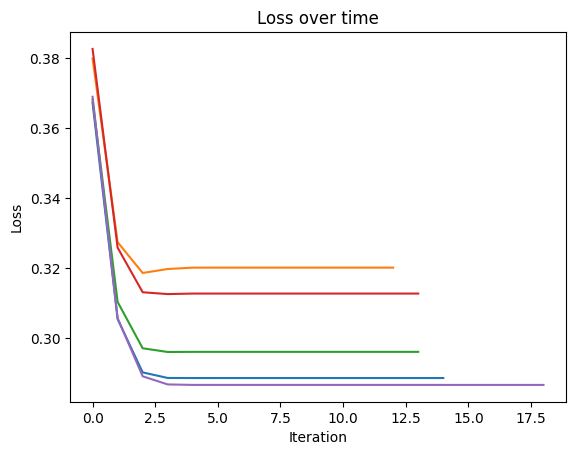

In [17]:
# IRLS
splitting_seeds = [42, 43, 44, 45, 46]
irls_accuracy = []
with open("results/balance_accuracy_3.csv", "a") as f:
    f.write(f"banana_data, irls")
    with open("losses.csv", "a") as l:
        l.write(f"banana_data, irls")
        for seed in splitting_seeds:
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.2, random_state=seed
            )
            X_train, X_val, y_train, y_val = train_test_split(
                X_train, y_train, test_size=0.2, random_state=seed
            )
            logistic_regression_model = LogisticRegression(input_dim=X_train.shape[1])
            irls_optimizer = IRLS()

            logistic_regression_model.train(
                X_train,
                y_train,
                optimizer=irls_optimizer,
                patience=10,
                epochs=500,
                batch_size=X_train.shape[0],
                X_val=X_val,
                y_val=y_val,
            )
            y_pred = logistic_regression_model.predict(X_test)
            irls_accuracy.append(balanced_accuracy_score(y_test, y_pred.round()))
            print(f"accuracy : {balanced_accuracy_score(y_test,y_pred.round())}")
            f.write(f", {balanced_accuracy_score(y_test,y_pred.round())}")
            logistic_regression_model.plot_loss()
            if seed == 42:
                l.write(f", {logistic_regression_model.losses}\n")

Epoch::   6%|▋         | 32/500 [00:00<00:04, 110.62it/s]


Early stopping after epoch 32
Reverting to the weights corresponding to the lowest validation loss
accuracy : 0.8840820018088634


Epoch:: 100%|██████████| 500/500 [00:03<00:00, 127.08it/s]


accuracy : 0.8855889724310777


Epoch:: 100%|██████████| 500/500 [00:03<00:00, 140.92it/s]


accuracy : 0.8687499999999999


Epoch:: 100%|██████████| 500/500 [00:03<00:00, 137.49it/s]


accuracy : 0.8725490808857999


Epoch:: 100%|██████████| 500/500 [00:03<00:00, 133.66it/s]


accuracy : 0.8607796616586425


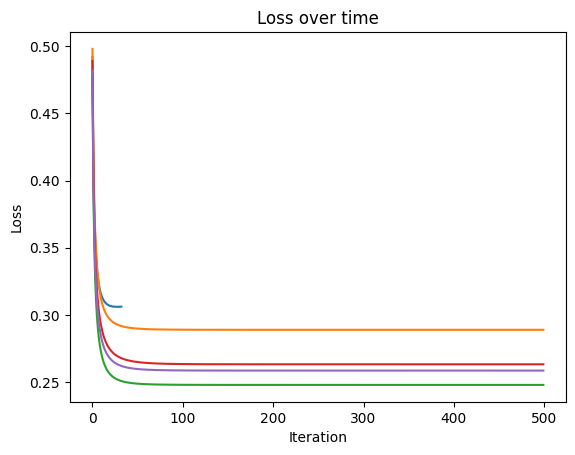

In [18]:
# SGD
ss = StandardScaler()
X_scaled = ss.fit_transform(X)
splitting_seeds = [42, 43, 44, 45, 46]
sgd_accuracy = []
with open("results/balance_accuracy_3.csv", "a") as f:
    f.write(f"banana_data, sgd")
    with open("losses.csv", "a") as l:
        l.write(f"banana_data, sgd")
        for seed in splitting_seeds:
            X_train, X_test, y_train, y_test = train_test_split(
                X_scaled, y, test_size=0.2, random_state=seed
            )
            X_val, X_test, y_val, y_test = train_test_split(
                X_test, y_test, test_size=0.5, random_state=seed
            )
            logistic_regression_model = LogisticRegression(input_dim=X_train.shape[1])
            sgd_optimizer = SGD(eta=0.01)

            logistic_regression_model.train(
                X_train,
                y_train,
                optimizer=sgd_optimizer,
                patience=5,
                epochs=500,
                batch_size=32,
                X_val=X_val,
                y_val=y_val,
            )
            y_pred = logistic_regression_model.predict(X_test)
            sgd_accuracy.append(balanced_accuracy_score(y_test, y_pred.round()))
            print(f"accuracy : {balanced_accuracy_score(y_test,y_pred.round())}")
            logistic_regression_model.plot_loss()
            f.write(f", {balanced_accuracy_score(y_test,y_pred.round())}")
            if seed == 42:
                l.write(f", {logistic_regression_model.losses}\n")

In [19]:
# Comparison Models
from utils import fitComparisonModels

splitting_seeds = [42, 43, 44, 45, 46]
comparison_accuracy = []
with open("results/balance_accuracy_3.csv", "a") as f:
    for seed in splitting_seeds:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=seed
        )
        y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
    f.write(f"banana_data, lda")
    for seed in splitting_seeds:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=seed
        )
        y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
        f.write(f", {balanced_accuracy_score(y_test, y_lda)}")
    f.write("\n")
    f.write(f"banana_data, qda")
    for seed in splitting_seeds:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=seed
        )
        y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
        f.write(f", {balanced_accuracy_score(y_test, y_qda)}")
    f.write("\n")
    f.write(f"banana_data, dt")
    for seed in splitting_seeds:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=seed
        )
        y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
        f.write(f", {balanced_accuracy_score(y_test, y_dt)}")
    f.write("\n")
    f.write(f"banana_data, rf")
    for seed in splitting_seeds:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=seed
        )
        y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
        f.write(f", {balanced_accuracy_score(y_test, y_rf)}")
    f.write("\n")

### with interactions ###

In [20]:
from utils import createFeatureInteractions

X_int = createFeatureInteractions(X)
print(len(X[0]), len(X_int[0]))

7 28


In [21]:
# ADAM
splitting_seeds = [42, 43, 44, 45, 46]
adam_accuracy = []
with open("results/balance_accuracy_3.csv", "a") as f:
    f.write(f"banana_data, adam+int")
    with open("losses.csv", "a") as l:
        l.write(f"banana_data, adam+int")
        for seed in splitting_seeds:
            X_train, X_test, y_train, y_test = train_test_split(
                X_int, y, test_size=0.2, random_state=seed
            )
            X_train, X_val, y_train, y_val = train_test_split(
                X_train, y_train, test_size=0.2, random_state=seed
            )
            logistic_regression_model = LogisticRegression(input_dim=X_train.shape[1])
            adam_optimizer = AdamOptim(eta=0.01)

            logistic_regression_model.train(
                X_train,
                y_train,
                optimizer=adam_optimizer,
                patience=5,
                epochs=500,
                batch_size=64,
                X_val=X_val,
                y_val=y_val,
            )
            y_pred = logistic_regression_model.predict(X_test)
            adam_accuracy.append(balanced_accuracy_score(y_test, y_pred.round()))
            f.write(f", {balanced_accuracy_score(y_test,y_pred.round())}")
            if seed == 42:
                l.write(f", {logistic_regression_model.losses}\n")

Epoch::  28%|██▊       | 140/500 [00:01<00:04, 73.07it/s]


Early stopping after epoch 140
Reverting to the weights corresponding to the lowest validation loss


Epoch::  10%|█         | 52/500 [00:00<00:06, 72.70it/s]


Early stopping after epoch 52
Reverting to the weights corresponding to the lowest validation loss


Epoch::   4%|▎         | 18/500 [00:00<00:06, 69.21it/s]


Early stopping after epoch 18
Reverting to the weights corresponding to the lowest validation loss


Epoch::   2%|▏         | 9/500 [00:00<00:07, 64.80it/s]


Early stopping after epoch 9
Reverting to the weights corresponding to the lowest validation loss


Epoch::   5%|▍         | 23/500 [00:00<00:06, 69.09it/s]

Early stopping after epoch 23
Reverting to the weights corresponding to the lowest validation loss


In [22]:
# SGD
splitting_seeds = [42, 43, 44, 45, 46]
sgd_accuracy = []
ss = StandardScaler()
X_scaled = ss.fit_transform(X_int)
with open("results/balance_accuracy_3.csv", "a") as f:
    f.write(f"banana_data, sgd+int")
    with open("losses.csv", "a") as l:
        l.write(f"banana_data, sgd+int")
        for seed in splitting_seeds:
            X_train, X_test, y_train, y_test = train_test_split(
                X_scaled, y, test_size=0.2, random_state=seed
            )
            X_val, X_test, y_val, y_test = train_test_split(
                X_test, y_test, test_size=0.5, random_state=seed
            )
            logistic_regression_model = LogisticRegression(input_dim=X_train.shape[1])
            sgd_optimizer = SGD(eta=0.01)

            logistic_regression_model.train(
                X_train,
                y_train,
                optimizer=sgd_optimizer,
                patience=5,
                epochs=500,
                batch_size=64,
                X_val=X_val,
                y_val=y_val,
            )
            y_pred = logistic_regression_model.predict(X_test)
            f.write(f", {balanced_accuracy_score(y_test,y_pred.round())}")
            if seed == 42:
                l.write(f", {logistic_regression_model.losses}\n")

Epoch::  25%|██▌       | 125/500 [00:00<00:02, 147.07it/s]

Early stopping after epoch 125
Reverting to the weights corresponding to the lowest validation loss


In [23]:
# IRLS
splitting_seeds = [42, 43, 44, 45, 46]
irls_accuracy = []
with open("results/balance_accuracy_3.csv", "a") as f:
    f.write(f"banana_data, irls+int")
    with open("losses.csv", "a") as l:
        l.write(f"banana_data, irls+int")
        for seed in splitting_seeds:
            X_train, X_test, y_train, y_test = train_test_split(
                X_int, y, test_size=0.2, random_state=seed
            )
            logistic_regression_model = LogisticRegression(input_dim=X_train.shape[1])
            irls_optimizer = IRLS()

            logistic_regression_model.train(
                X_train,
                y_train,
                optimizer=irls_optimizer,
                patience=10,
                epochs=500,
                batch_size=X_train.shape[0],
            )
            y_pred = logistic_regression_model.predict(X_test)
            irls_accuracy.append(balanced_accuracy_score(y_test, y_pred.round()))
            print(f"accuracy : {balanced_accuracy_score(y_test,y_pred.round())}")
            f.write(f", {balanced_accuracy_score(y_test,y_pred.round())}")
            if seed == 42:
                l.write(f", {logistic_regression_model.losses}\n")

Epoch::   3%|▎         | 17/500 [00:09<04:24,  1.83it/s]


Early stopping after epoch 17
Reverting to the weights corresponding to the lowest train loss
accuracy : 0.958116218679599


Epoch::   3%|▎         | 17/500 [00:10<04:46,  1.69it/s]


Early stopping after epoch 17
Reverting to the weights corresponding to the lowest train loss
accuracy : 0.9618750888906602


Epoch::   4%|▎         | 18/500 [00:10<04:33,  1.76it/s]


Early stopping after epoch 18
Reverting to the weights corresponding to the lowest train loss
accuracy : 0.9531075406444031


Epoch::   3%|▎         | 17/500 [00:08<04:08,  1.94it/s]


Early stopping after epoch 17
Reverting to the weights corresponding to the lowest train loss
accuracy : 0.9505427170868348


Epoch::   6%|▌         | 28/500 [00:14<04:02,  1.95it/s]

Early stopping after epoch 28
Reverting to the weights corresponding to the lowest train loss
accuracy : 0.9483264559699749


In [24]:
# Comparison Models
from utils import fitComparisonModels

splitting_seeds = [42, 43, 44, 45, 46]
comparison_accuracy = []
with open("results/balance_accuracy_3.csv", "a") as f:
    for seed in splitting_seeds:
        X_train, X_test, y_train, y_test = train_test_split(
            X_int, y, test_size=0.2, random_state=seed
        )
        y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
    f.write(f"banana_data, lda+int")
    for seed in splitting_seeds:
        X_train, X_test, y_train, y_test = train_test_split(
            X_int, y, test_size=0.2, random_state=seed
        )
        y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
        f.write(f", {balanced_accuracy_score(y_test, y_lda)}")
    f.write("\n")
    f.write(f"banana_data, qda+int")
    for seed in splitting_seeds:
        X_train, X_test, y_train, y_test = train_test_split(
            X_int, y, test_size=0.2, random_state=seed
        )
        y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
        f.write(f", {balanced_accuracy_score(y_test, y_qda)}")
    f.write("\n")
    f.write(f"banana_data, dt+int")
    for seed in splitting_seeds:
        X_train, X_test, y_train, y_test = train_test_split(
            X_int, y, test_size=0.2, random_state=seed
        )
        y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
        f.write(f", {balanced_accuracy_score(y_test, y_dt)}")
    f.write("\n")
    f.write(f"banana_data, rf+int")
    for seed in splitting_seeds:
        X_train, X_test, y_train, y_test = train_test_split(
            X_int, y, test_size=0.2, random_state=seed
        )
        y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
        f.write(f", {balanced_accuracy_score(y_test, y_rf)}")
    f.write("\n")